In [3]:
import numpy as np
from scipy.signal import hilbert
import matplotlib.pyplot as plt

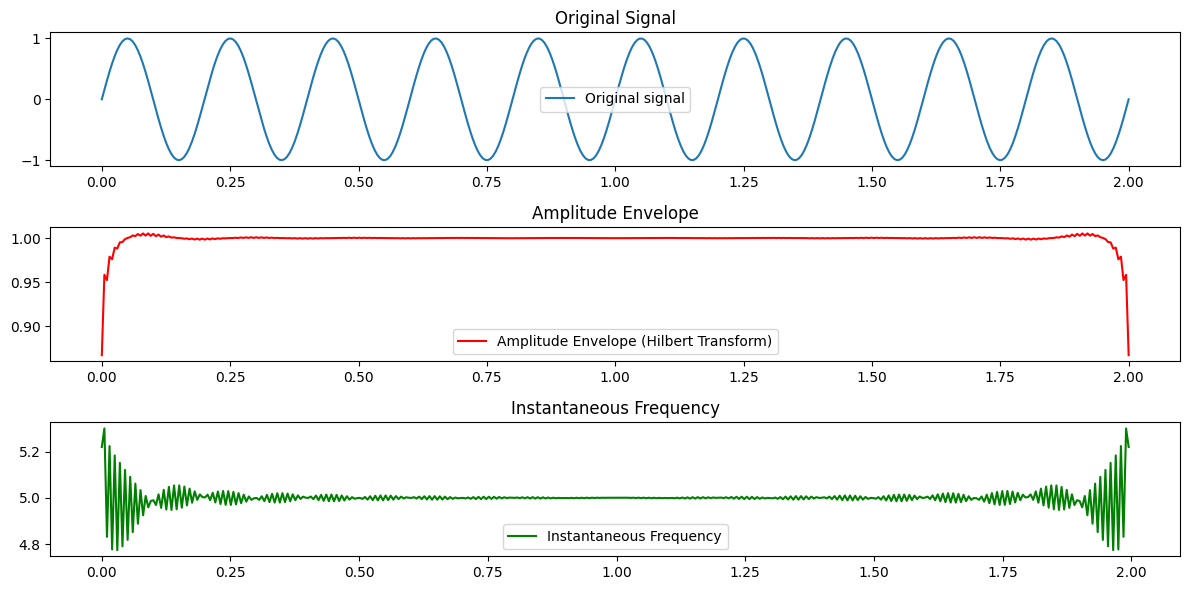

In [4]:

# Generate a signal (e.g., a sine wave)
t = np.linspace(0, 2.0, 400)  # 0 to 2 seconds, 400 points
signal = np.sin(2.0 * np.pi * 5.0 * t)  # 5 Hz sine wave

# Compute the analytic signal
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi * np.diff(t))

# Plot the original signal and its Hilbert transform
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Original signal')
plt.title('Original Signal')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, amplitude_envelope, label='Amplitude Envelope (Hilbert Transform)', color='red')
plt.title('Amplitude Envelope')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t[:-1], instantaneous_frequency, label='Instantaneous Frequency', color='green')
plt.title('Instantaneous Frequency')
plt.legend()

plt.tight_layout()
plt.show()